# Descriptive statistics
Descriptive statistics is the collection, organization, summarization, and presentation of data. We will do descriptive statistics analysis on below dataset. There are many topics in descriptive statistics and we will do all one by one. Descriptive statistics helps us in understanding of data.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv("data.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


# Measure of Central Tendancy(MCT): 
MCT is a statistical Univariate Analysis:
- Mean
- Median 
- Mode

# Mean
The mean is the average or the most common value in a collection of numbers.
- Usually choose when we have contious data
- It is impacted due to Outlier
- If no outlier is present then mean is preferred in compared to median

$$ Mean =\frac{1}{N}\sum_{i=1}^{N}X_{i} $$


**Using In-Built Methods**

In [3]:
df.mean()

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

**Using Formulae**

In [12]:
cols=list(df.columns)
cols.remove('Highest_Qualified_Member')
for column in cols:
    data=df[column]
    print(column,"  ",(sum(data)/len(data)))

Mthly_HH_Income    41558.0
Mthly_HH_Expense    18818.0
No_of_Fly_Members    4.06
Emi_or_Rent_Amt    3060.0
Annual_HH_Income    490019.04
No_of_Earning_Members    1.46


# Median
The median is the middle number in a sorted, ascending or descending, list of numbers
- Usually choose when we have contious data
- Robust from Outlier
- If no outlier present in data then calculating the mdeian takes more time in sorting the data( of Time Complexity : $ \theta(n \log n)$ )

Case 1: if no of element is odd
$$ Median = (\frac{n+1}{2})^{th} value $$
    
   
Case 2: if no of element is even
$$ Median = (\frac{(\frac{n}{2}+ (\frac{n}{2}+1))}{2})^{th} value $$

    

**Using In-Built Methods**

In [16]:
cols=list(df.columns)
cols.remove('Highest_Qualified_Member')
for column in cols:
    data=sorted(df[column])
    print(column,"  ",(np.median(data)))

Mthly_HH_Income    35000.0
Mthly_HH_Expense    15500.0
No_of_Fly_Members    4.0
Emi_or_Rent_Amt    0.0
Annual_HH_Income    447420.0
No_of_Earning_Members    1.0


**Using Formulae**

In [21]:
cols=list(df.columns)
cols.remove('Highest_Qualified_Member')
for column in cols:
    data=sorted(df[column])
    n=len(data)
    if n%2 == 0:
        median = data[((n//2) + ((n//2)+1)) // 2]
    else:
        median = data[(n+1)//2] 
    print(column,"  ",median)

Mthly_HH_Income    35000
Mthly_HH_Expense    16000
No_of_Fly_Members    4
Emi_or_Rent_Amt    0
Annual_HH_Income    449400
No_of_Earning_Members    1


# Mode
The mode is the value that appears most often in a set of data values.
- it is usually used when we have categorical value
- It won't get affected from outlier
- If a mode is there then it is called unimodel
- If a mode is 2 then it is called bimodel
- If a mode is more than 2, then it is called Multi Model

$$ Mode = Max(Frequency \ of \  X_i ) $$



**Using In-Built Methods**

In [23]:
df.mode().transpose()


,0
Mthly_HH_Income,45000
Mthly_HH_Expense,25000
No_of_Fly_Members,4
Emi_or_Rent_Amt,0
Annual_HH_Income,590400
Highest_Qualified_Member,Graduate
No_of_Earning_Members,1


**Using Formulae**

In [25]:
cols=list(df.columns)
for column in cols:
    data=sorted(df[column])
    di={ i:data.count(i) for i in data }
    mode=max(di,key=lambda x:di[x])
    print(column,"  ",mode)

Mthly_HH_Income    45000
Mthly_HH_Expense    25000
No_of_Fly_Members    4
Emi_or_Rent_Amt    0
Annual_HH_Income    590400
Highest_Qualified_Member    Graduate
No_of_Earning_Members    1


# Trimmed Mean
- Take the values in range between IQ1 - IQ3, rest discard the values
  take average of values 
- Trimmed Mean =   1/ len(IQ1-IQ2)* [ IQ3 i=IQ1 sum (xi)  ]


# Measure of Spread or Dispersion
- It is also a univariate analysis
These are :
- Range
- IQR (Inter Quartile Range)
- Variance
- Standard of Variance

# Range
The range is the spread of your data from the lowest to the highest value in the distribution.
- Range will be affected due to outliers

$$ Range= Max(X_i)- Min(X_i) $$

# IQR(Inter Quartile Range):

- Percentile(divide data by 100 equal parts) : Relative element to the whole dataset
    
    - maximum = 100th percentile
    - minimum= 1st percentile
    - median = 50th percentile
    
- Quartile:     (divide data by 4 equal parts)
    - Total no of split is 3 
       - First at 25 %   == IQ1
       - Second at 50 %  == IQ2
       - Third at 75%    == IQ3
    
- Decile :     Divide data by 10 equal parts
        
- Quintile:    Divide data by 5 equal parts
    
- IQR= IQ3 -IQ1
    - IQR is not get impacted due to outliers
    - for calculating the IQR, we need to sort the data first
    
        
        

# Variance ($ \sigma ^2 $)

Variance means How the data is spread out around the mean.
- Variance is also affected due to outliers

$$ Variance (\sigma ^2)=  \frac{1}{n} \Sigma (X_i -  \mu_x)^2 $$






**Using In-Built Methods**

In [26]:
df.var()

Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

**Using Formulae**

In [30]:
cols=list(df.columns)
cols.remove('Highest_Qualified_Member')
for column in cols:
    data=df[column]
    mean=sum(data)/len(data)
    var_data=[(i-mean)**2 for i in data]
    variance=sum(var_data)/len(var_data)
    print(column,"  ",variance)
        

Mthly_HH_Income    667478836.0
Mthly_HH_Expense    143249876.0
No_of_Fly_Members    2.2564
Emi_or_Rent_Amt    38176400.0
Annual_HH_Income    100437186889.95831
No_of_Earning_Members    0.5284


#  Standard deviation  ($ \sigma $) 

Standard deviation measures the spread of the data about the mean value.

**[Note : Deviation means how far it is from mean]**
- It is also affected due to outliers

$$ Standard Deviation (\sigma) = \sqrt{\sigma^2} $$ 

**Using In-Built Methods**

In [32]:
df.std()

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

**Using Formulae**

In [33]:
cols=list(df.columns)
cols.remove('Highest_Qualified_Member')
for column in cols:
    data=df[column]
    mean=sum(data)/len(data)
    var_data=[(i-mean)**2 for i in data]
    variance=sum(var_data)/len(var_data)
    print(column,"  ",variance**0.5)

Mthly_HH_Income    25835.611779092826
Mthly_HH_Expense    11968.704023410388
No_of_Fly_Members    1.502131818450032
Emi_or_Rent_Amt    6178.705366013175
Annual_HH_Income    316918.26531451027
No_of_Earning_Members    0.72691127381545


# MAD 
$ \Rightarrow $ Median absolute Deviation
   - Robost to the outlier cause we are calculating the median
    - Since Median is calculated by sorting the data, thus increases the time Complexity
    
$$ Median \ Absolute \ Deviation =  Median ( \ | X_i - Median | \ ) $$

 $ \Rightarrow $ Mean Absolute Deviation
$$ Mean \ Absolute \ Deviation = \frac{1}{n}\Sigma( \ |x_i- Median| \ ) $$
    

# Measure of Relationship
It is ised for Bivariate Analysis
- Correlation
- Covariance

# CoVariance
Correlation measures the strength and direction of the linear relationship between two variables. The values range between -1.0 and 1.0. There are three cases 
- **Case 1** : if the result is +ve   implies that if X increases then Y increases
- **Case 2** : if the result is -ve implies that if X increases then Y decreases
- **Case 3** : if the result is 0 implies that it has no effect.

$$ Covariance_{(x,y)} =\frac{1}{n}\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y) $$ 


# Correlation

Pearson Correlation Coeff: $ \rho_(x,y)$
   - -1 <= rho xy <=+1
   - **Case 1** : if the result is +ve   implies that if X increases then Y increases
   - **Case 2** : if the result is -ve implies that if X increases then Y decreases
   - **Case 3** : if the result is 0 implies that it has no effect.
   - Can only applicable to linear relationship only
    
  $$ \rho_(x,y) = \frac{Cov_(x,y)}{\sigma_x \ \sigma_y}  $$




        

**Using In-Built Methods**

In [35]:
df.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


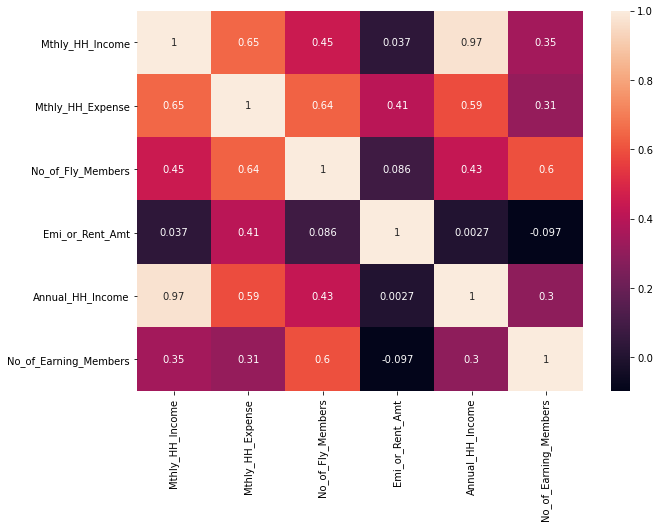

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Using Formulae**

In [45]:
cols=list(df.columns)
cols.remove('Highest_Qualified_Member')
data=[]
for column_rows in cols:
    temp=[]
    for column_header in cols:
        x = df[column_rows]
        y = df[column_header]
        n = len(x)
        
        mu_x = sum(x)/n
        std_x = []
        mu_y = sum(y)/n
        std_y = []
        summation = []
        for i in range(n):
            std_x.append((x[i]-mu_x)**2)
            std_y.append((y[i]-mu_y)**2)
            summation.append((x[i]-mu_x)*(y[i]-mu_y))

        std_x = (sum(std_x)/n)**0.5
        std_y = (sum(std_y)/n)**0.5

        correlation = sum(summation)/(n*std_x*std_y)
        temp.append(correlation)
        #print(correlation)
    data.append(temp)
    
corr_data=pd.DataFrame(data,columns=cols,index=cols)
corr_data

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


# Normal Distribution:
A normal distribution, sometimes called the bell curve, is a distribution that occurs naturally in many situations. 
For example, the bell curve is seen in height of a person in a Society.
$$ Normal Distribution = \frac{1}{\sqrt{2\pi\sigma}} \epsilon^{\frac{-(x-\mu)^2}{2\sigma^2}} $$

# Properties of Normal Distribution -
There are many properties of normal distribution -
- The curve is symmetrical about the vertical axis
- Due to symmetry, the mean, median, mode of the normal distribution are identical

Bell shaped curve 68 - 95 - 99.7 % Rule
- $ (\mu \underset{-}{+} \sigma) $ 1 std. away from the mean $ \rightarrow $ 68% data will cover
- $ (\mu \underset{-}{+} 2\sigma) $ 2 std. away from the mean $ \rightarrow $ 95% data will cover
- $ (\mu \underset{-}{+} 3\sigma) $ 3 std. away from the mean $ \rightarrow $ 99.7% data will cover

C:\Users\Anonymous\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


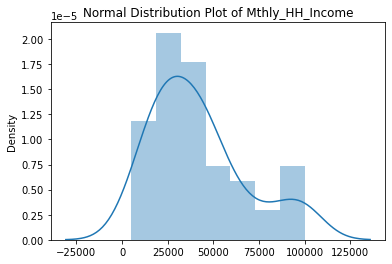

In [60]:
sns.distplot(np.array(df['Mthly_HH_Income']))
plt.title('Normal Distribution Plot of Mthly_HH_Income')
plt.show()

C:\Users\Anonymous\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


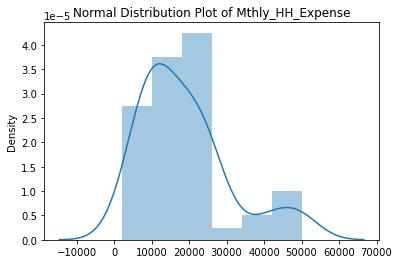

In [67]:
sns.distplot(np.array(df['Mthly_HH_Expense']))
plt.title('Normal Distribution Plot of Mthly_HH_Expense')
plt.show()

C:\Users\Anonymous\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


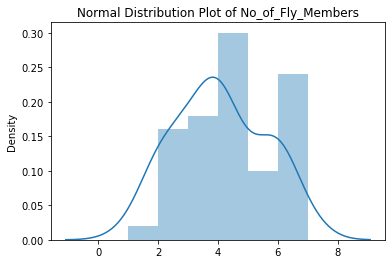

In [66]:
sns.distplot(np.array(df['No_of_Fly_Members']))
plt.title('Normal Distribution Plot of No_of_Fly_Members')
plt.show()

C:\Users\Anonymous\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


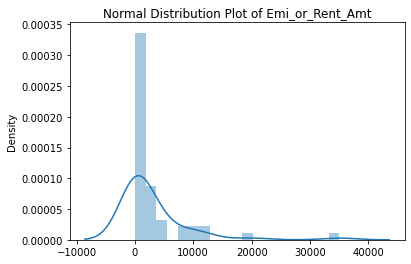

In [65]:
sns.distplot(np.array(df['Emi_or_Rent_Amt']))
plt.title('Normal Distribution Plot of Emi_or_Rent_Amt')
plt.show()

C:\Users\Anonymous\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


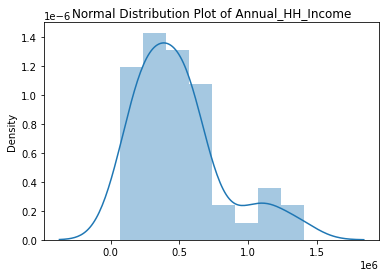

In [64]:
sns.distplot(np.array(df['Annual_HH_Income']))
plt.title('Normal Distribution Plot of Annual_HH_Income')
plt.show()

C:\Users\Anonymous\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


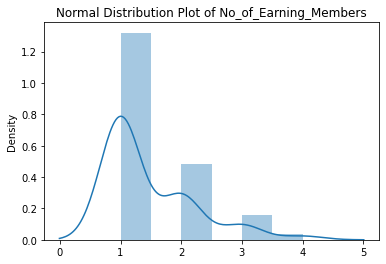

In [69]:
sns.distplot(np.array(df['No_of_Earning_Members']))
plt.title('Normal Distribution Plot of No_of_Earning_Members')
plt.show()

# Skewness -
Skewness refers to distortion or asymmetry in a normal distribution. If the curve is shifted to the left or to the right, it is said to be skewed. A normal distribution has a skew of zero.
- If the curve shifted to the left, it is said to be Negatively skewed
- If the curve shifted to the right, it is said to be Positively skewed
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

# Effect on Mean, Median, Mode due to Skewness -
- Positively skewed and Negatively skewed effect mean, median and mode also. 

Generally 
-  if the distribution of data is skewed to the left, the mean is less than the median, which is often less than the mode. 
-  If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean. 
-  If the skewness value is 0 then we can say mean, median and mode are identical.

In [70]:
normal_dist = df['Mthly_HH_Income']
normal_dist.skew()

0.9246148763777229

# Q-Q Plot -
- Q-Q Plot refers to quantile-quantile plot. 
- It is a way to test normality of a distribution. 
- With the help of this we can check skewness, kurtosis. 
- It is a plot of the quantiles of two distributions against eachother. 
- The pattern of the points in the plot is used to compare the two distributions.
- A 45$^{\circ}$ reference line is also plotted. If the two sets come with the same distribution, the points should fall approximately along this reference line

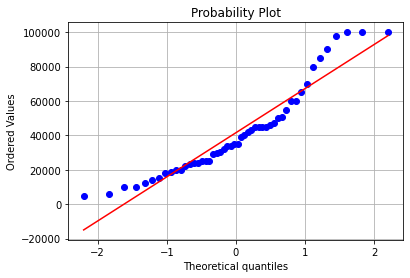

In [71]:
stats.probplot(normal_dist, dist="norm", plot=plt)
plt.grid()

# Box-Cox Transformation -
- We use Box-Cox plot to transform any pareto, log, positively skewed, negatively skewed distributions to a normal distribution. 
- The box-cox normality plot is a plot of these correlation coefficients for various values of the lambda parameter.
- The histogram of the data after applying the box-cox transformation with $ \lambda $ = -0.3 shows a dataset for which the normality assumption is reasonable.

In [72]:
x_t, l = stats.boxcox(normal_dist)
print(l)

0.3031376789702236


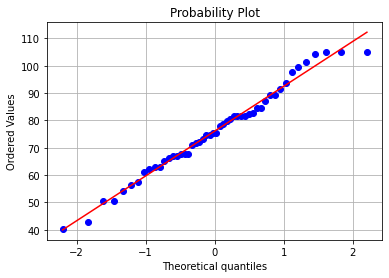

In [73]:
stats.probplot(x_t, dist="norm", plot=plt)
plt.grid()

**As we can see many of the points are falling on line after Box-Cox Transformation and it is now normally distributed**

C:\Users\Anonymous\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anonymous\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


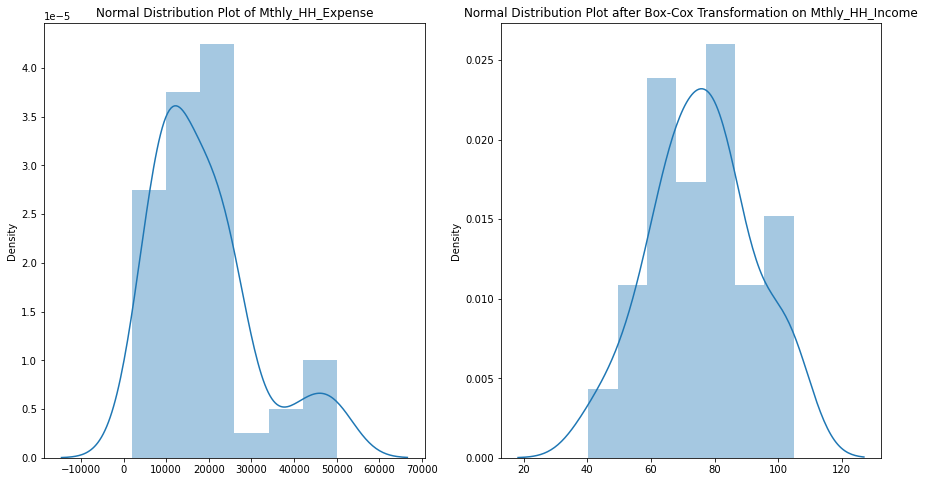

In [78]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.distplot(np.array(df['Mthly_HH_Expense']))
plt.title('Normal Distribution Plot of Mthly_HH_Expense')

plt.subplot(1, 2, 2)
sns.distplot(np.array(x_t))
plt.title('Normal Distribution Plot after Box-Cox Transformation on Mthly_HH_Income')

plt.show()

# Thank You !!
# Hope You Like It
@Shubhankar Satvaya